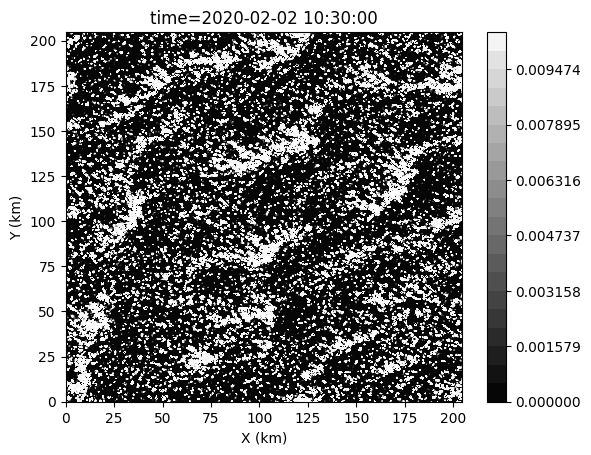

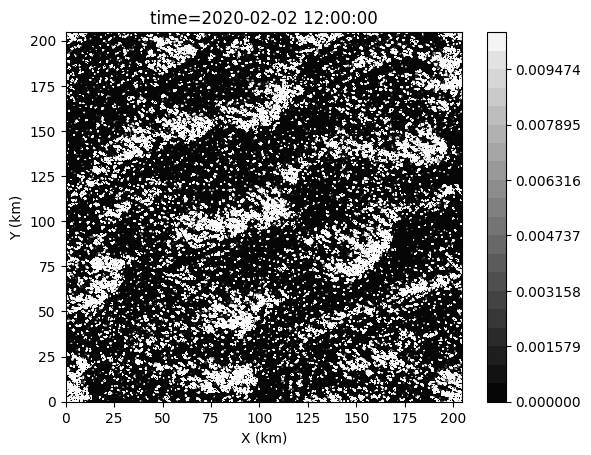

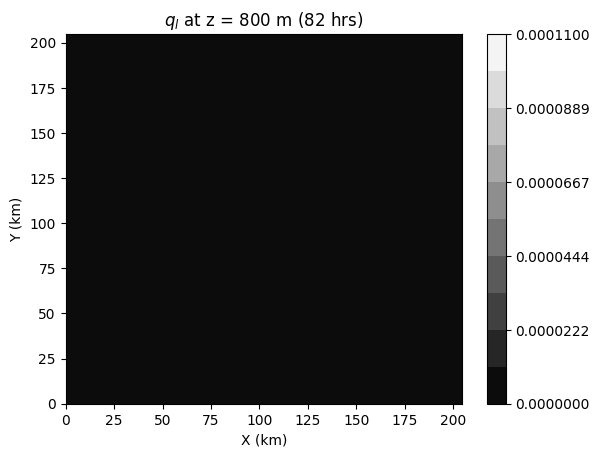

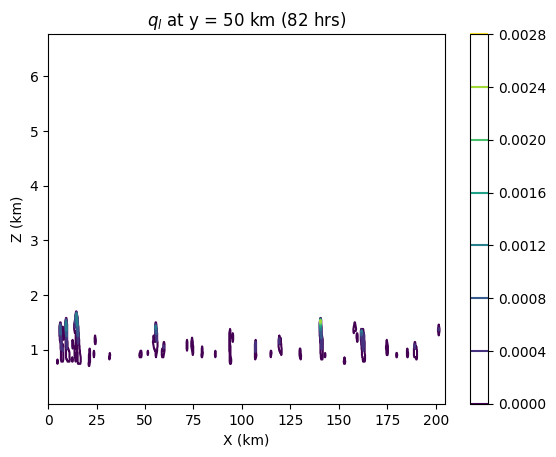

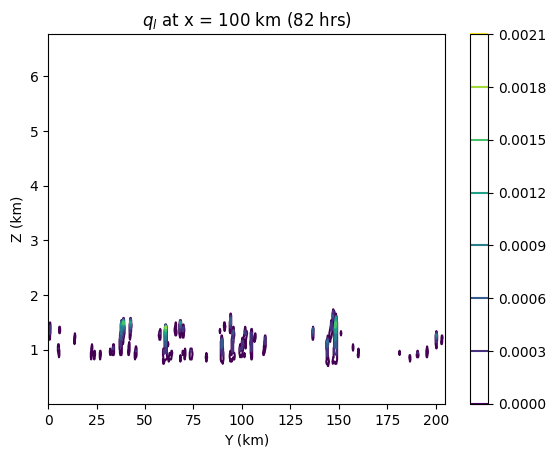

In [2]:
#### Field Plots #####
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import cm
from datetime import datetime, timedelta
#### Inputs ####
path_variable='qlpath'
x_dim=1024; 
y_dim=1024; 
dz_fine = 40;
dl=200;
date=2;
hr1=82.5; hr2=84; hr3=82;
flx='lagtraj'
scale='g'
z_opt='bl'
traj=1
start_time=datetime(2020,1,30,00)

pwd=f'/fs/ess/PFS0220/eurec4a/case_feb2nd_1024_{dl}m_jan30/'

ref_height=int(800/dz_fine); 
ref_length_x=int(100000/dl);
ref_length_y=int(50000/dl);
height_lim=int(6000/dz_fine);
path1=str(format(int(hr1*36),'04d')); path2=str(format(int(hr2*36),'04d')); ql_time=str(format(int(hr3*36),'04d'))


levs=np.concatenate((np.linspace(0,0.01,20),np.linspace(0.011,1,1)))
levs_abs=np.concatenate((np.linspace(0,0.0001,10),np.linspace(0.00011,1,1)))

fid = open(pwd+'ql.000'+ql_time,'rb')
var = np.fromfile(fid)

x=np.linspace(0,x_dim*dl,x_dim)
y=np.linspace(0,y_dim*dl,y_dim)

if z_opt=='l':
    z_fine_top = 6000.;
    k_fine = z_fine_top/dz_fine;
    z1 = np.linspace(0.5*dz_fine, z_fine_top-0.5*dz_fine, int(k_fine));

    z_coarse_top = 32001;
    dz_coarse = 1000;
    z2 = np.arange(z_fine_top, z_coarse_top, dz_coarse)
    z = np.concatenate((z1, z2))
elif z_opt=='nl':
    z_new=np.zeros(260)
    z_abs=20
    dz=40;
    for i in range(0,z_new.size): 
        if i>150:
            dz=dz+int(round(0.1*dz,0));
        z_new[i] = z_abs;
        z_abs = z_abs+dz
else:
    z_new=np.zeros(300)
    dz=10
    z_abs=10;
    for i in range(0,z_new.size): 
            if i<12:
                dz=dz+int(round(0.1*dz,0));
            elif i==14:
                z_abs=300;
                dz=40;
            elif z_abs>5000:
                dz=dz+int(round(0.1*dz,0));
            z_new[i] = z_abs;
            z_abs = z_abs+dz
    z_end_ind=np.nonzero((z_new>29000))[0][0]
    z=z_new[0:z_end_ind+1]


var=np.reshape(var,[z.size,x_dim,y_dim])
var_plot=var[ref_height,:,:]

#var=np.reshape(var,[len_dim,len_dim])
#var_plot=var[:,:]

fid = open(pwd+f'{path_variable}.xy.000'+path1,'rb')
var_cross = np.fromfile(fid)
var_plot_cross=np.reshape(var_cross,[x_dim,y_dim])

pl.figure()
if scale=='g':
    pl.contourf(x/1000,y/1000,var_plot_cross,levels=levs,cmap=cm.gray)
else:
    pl.contour(x/1000,y/1000,var_plot_cross)
#pl.contour(x,y,var_plot_cross,levels=levs)
#pl.contourf(x,y,var_plot_cross>0.01,cmap=cm.gray)
if flx =='d2':
    pl.title('$q_l$ path at %d hrs' %(int(path1)/36) + '\n starting from day-2 (24 hrs)')
elif flx == 'd2.5':
    pl.title('$q_l$ path at %d hrs' %(int(path1)/36) + '\n starting from day-2.5 (36 hrs)')
else:
    pl.title(f'time={start_time+timedelta(hours=hr1)}')
    
pl.xlabel('X (km)')
pl.ylabel('Y (km)')
pl.colorbar()
pl.show()

fid = open(pwd+'qlpath.xy.000'+path2,'rb')
var_cross = np.fromfile(fid)
var_plot_cross=np.reshape(var_cross,[x_dim,y_dim])

pl.figure()
if scale =='g':
    pl.contourf(x/1000,y/1000,var_plot_cross,levels=levs,cmap=cm.gray)
else:
    pl.contour(x/1000,y/1000,var_plot_cross)
#pl.contourf(x,y,var_plot_cross>0.01,cmap=cm.gray)
if flx =='d2':
    pl.title('$q_l$ path at %d hrs' %(int(path2)/36) + '\n starting from day-2 (24 hrs)')
elif flx == 'd2.5':
    pl.title('$q_l$ path at %d hrs' %(int(path2)/36) + '\n starting from day-2.5 (36 hrs)')
else:
    pl.title(f'time={start_time+timedelta(hours=hr2)}')
pl.xlabel('X (km)')
pl.ylabel('Y (km)')
pl.colorbar()
pl.show()

pl.figure()
if scale =='g':
    pl.contourf(x/1000,y/1000,var_plot,levels=levs_abs,cmap=cm.gray)
else:
    pl.contour(x/1000,y/1000,var_plot>1)

#pl.contourf(x,y,var_plot>0,cmap=cm.gray)
if flx =='d2':
    pl.title('$q_l$ at z = %d m' %(ref_height*dz_fine) + ' (%d hrs)'  %(int(ql_time)/36) + '\n starting from day-2 (24 hrs)')
elif flx == 'd2.5':
    pl.title('$q_l$ at z = %d m' %(ref_height*dz_fine) + ' (%d hrs)'  %(int(ql_time)/36) + '\n starting from day-2.5 (36 hrs)')
else:
    pl.title('$q_l$ at z = %d m' %(ref_height*dz_fine) + ' (%d hrs)'  %(int(ql_time)/36))

pl.xlabel('X (km)')
pl.ylabel('Y (km)')
pl.colorbar()
pl.show()


var_plot=var[0:height_lim,ref_length_y,:]
pl.figure()
pl.contour(x/1000,z[0:height_lim]/1000,var_plot)
if flx =='d2':
    pl.title('$q_l$ at y = %d km' %(ref_length_y*dl/1000) + ' (%d hrs)'  %(int(ql_time)/36) + '\n starting from day-2 (24 hrs)')
elif flx == 'd2.5':
    pl.title('$q_l$ at y = %d km' %(ref_length_y*dl/1000) + ' (%d hrs)'  %(int(ql_time)/36) + '\n starting from day-2.5 (36 hrs)')
else:
    pl.title('$q_l$ at y = %d km' %(ref_length_y*dl/1000) + ' (%d hrs)'  %(int(ql_time)/36))
    
pl.xlabel('X (km)')
pl.ylabel('Z (km)')
pl.colorbar()
pl.show()

var_plot=var[0:height_lim,:,ref_length_x]
pl.figure()
pl.contour(y/1000,z[0:height_lim]/1000,var_plot)
if flx=='d2':
    pl.title('$q_l$ at x = %d km' %(ref_length_x*dl/1000) + ' (%d hrs)'  %(int(ql_time)/36) + '\n starting from day-2 (24 hrs)')
elif flx == 'd2.5':
    pl.title('$q_l$ at x = %d km' %(ref_length_x*dl/1000) + ' (%d hrs)'  %(int(ql_time)/36) + '\n starting from day-2.5 (36 hrs)')
else:
    pl.title('$q_l$ at x = %d km' %(ref_length_x*dl/1000) + ' (%d hrs)'  %(int(ql_time)/36))
pl.xlabel('Y (km)')
pl.ylabel('Z (km)')
pl.colorbar()
pl.show()

<class 'netCDF4._netCDF4.Group'>
group /budget:
    dimensions(sizes): 
    variables(dimensions): float64 ke(time, z), float64 tke(time, z), float64 u2_shear(time, z), float64 v2_shear(time, z), float64 tke_shear(time, z), float64 uw_shear(time, zh), float64 vw_shear(time, zh), float64 u2_turb(time, z), float64 v2_turb(time, z), float64 w2_turb(time, zh), float64 tke_turb(time, z), float64 uw_turb(time, zh), float64 vw_turb(time, zh), float64 w2_pres(time, zh), float64 tke_pres(time, z), float64 uw_pres(time, zh), float64 vw_pres(time, zh), float64 u2_rdstr(time, z), float64 v2_rdstr(time, z), float64 w2_rdstr(time, zh), float64 uw_rdstr(time, zh), float64 vw_rdstr(time, zh), float64 u2_cor(time, z), float64 v2_cor(time, z), float64 uw_cor(time, zh), float64 vw_cor(time, zh), float64 u2_diff(time, z), float64 v2_diff(time, z), float64 w2_diff(time, zh), float64 tke_diff(time, z), float64 uw_diff(time, zh), float64 vw_diff(time, zh), float64 w2_buoy(time, zh), float64 tke_buoy(time, z)

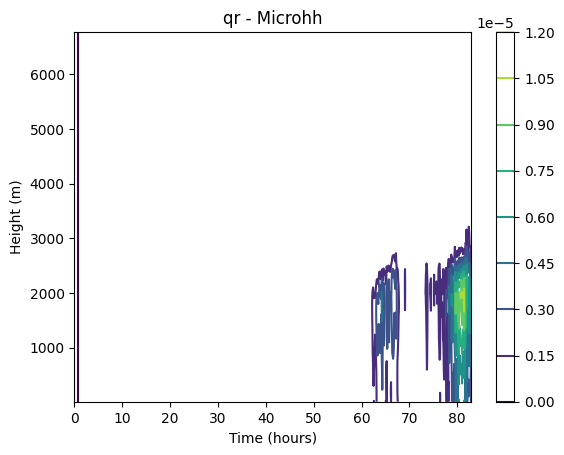

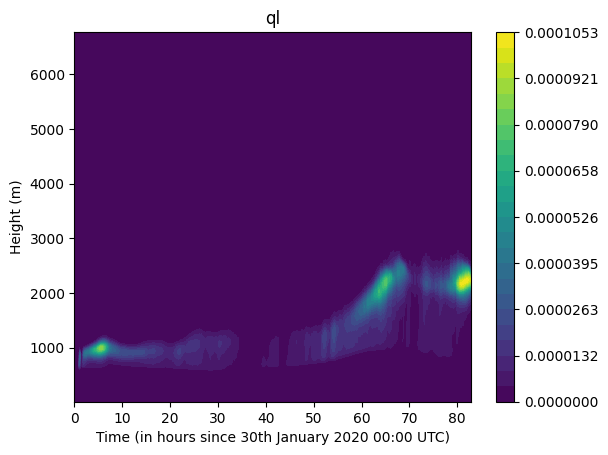

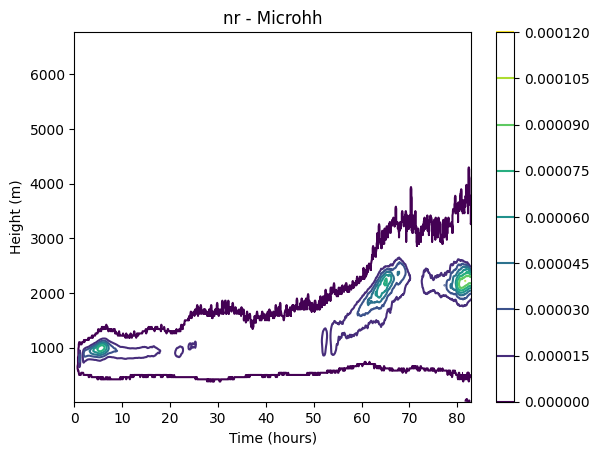

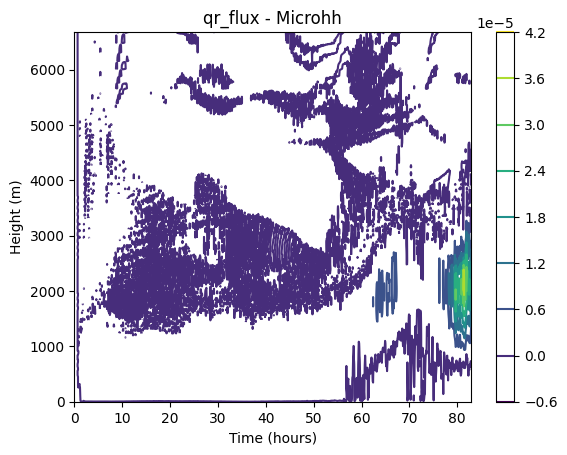

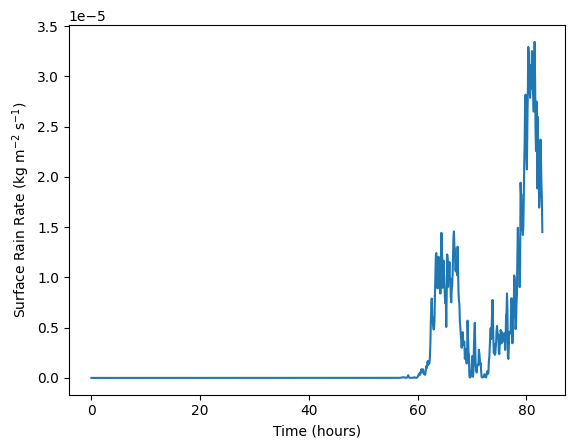

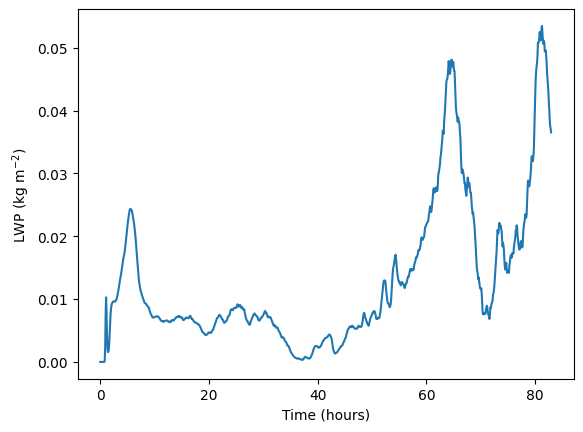

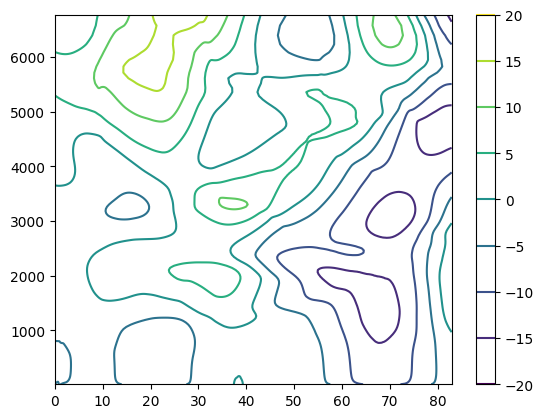

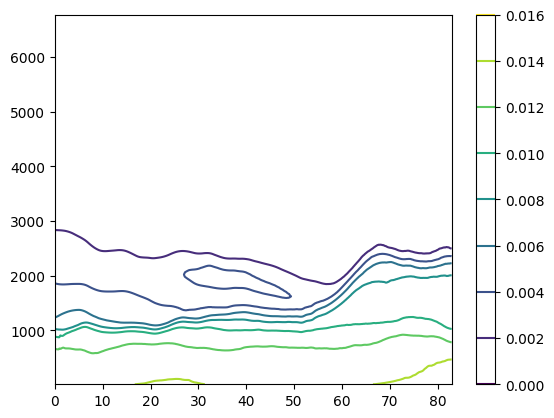

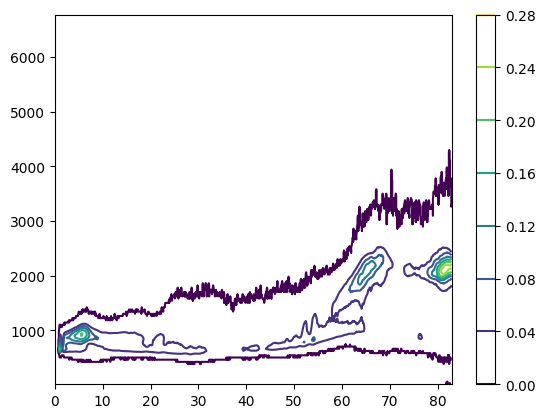

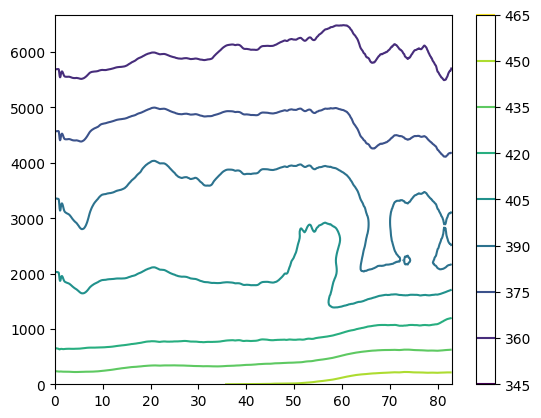

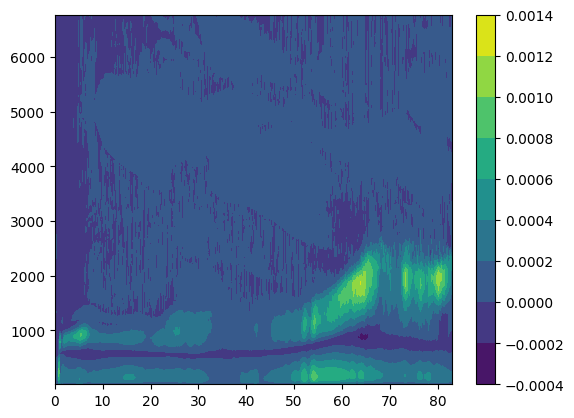

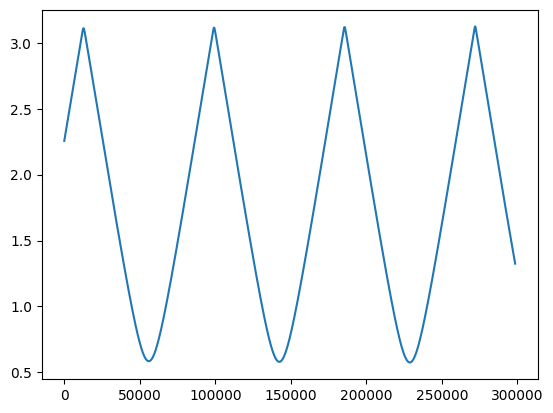

In [2]:
### Plot from 3 files ###
import numpy as np
import matplotlib.pyplot as pl
import netCDF4 as nc
import xarray as xr
from datetime import datetime


#pwd='/users/PFS0220/graghuna/microhh/microhh/cases/eurec4a/case_1060T1_feb2_100m_36hrs/'
pwd='/fs/ess/PFS0220/eurec4a/case_feb2nd_specific_final_200m_512/'
nc_nums=1;
nc_vals = ['0000']
#nc_vals = ['0000','0576','1152','1728','2304','2880']
#nc_vals = ['0000','1152','2304']
dz=40; z_ind=int(6000/dz);
startdate=datetime(2020,1,30,00,00)


for n in range(nc_nums):
    nc_filename='eurec4a.default.000' + nc_vals[n]+'.nc';
    xrdata=xr.open_dataset(pwd+nc_filename,decode_times=False)
    xrdata_def=xr.open_dataset(pwd+nc_filename,group='default',decode_times=False);
    xrdata_thermo=xr.open_dataset(pwd+nc_filename,group='thermo',decode_times=False);
    xrdata_rad=xr.open_dataset(pwd+nc_filename,group='radiation',decode_times=False);
    xrdata_budget=xr.open_dataset(pwd+nc_filename,group='budget',decode_times=False);

    z1=xrdata['z'].values
    zh1=xrdata['zh'].values
    time1=xrdata['time'].values
    qr1 = xrdata_thermo['qr'].values;
    ql1 = xrdata_thermo['ql'].values;
    qt1 = xrdata_thermo['qt'].values;
    u1 = xrdata_def['u'].values;
    ql_frac1 = xrdata_thermo['ql_frac'].values;
    rr1 = xrdata_thermo['rr'].values
    qlpath1=xrdata_thermo['ql_path']
    qr_flux1=xrdata_thermo['qr_flux'].values;
    nr1=xrdata_thermo['ql'].values;
    if n==0:
        z=z1; 
        zh=zh1; 
        time=time1;
        qr=qr1;
        ql=ql1;
        qt=qt1;
        u=u1;
        ql_frac=ql_frac1;
        rr=rr1;
        qlpath=qlpath1;
        qr_flux=qr_flux1;
        nr=nr1
    else:
        z=np.concatenate((z,z1));
        zh=np.concatenate((zh,zh1));
        time=np.concatenate((time,time1));
        qr=np.concatenate((qr,qr1));
        ql=np.concatenate((ql,ql1));
        qt=np.concatenate((qt,qt1));
        u=np.concatenate((u,u1));
        ql_frac=np.concatenate((ql_frac,ql_frac1));
        rr=np.concatenate((rr,rr1));
        qlpath=np.concatenate((qlpath,qlpath1));
        qr_flux=np.concatenate((qr_flux,qr_flux1));
        nr=np.concatenate((nr,nr1));

ds=nc.Dataset(pwd+nc_filename)
print(ds.groups['budget'])

time=time/3600

pl.figure()
pl.contour(time,z[0:z_ind],np.transpose(qr[:,0:z_ind]))
pl.title('qr - Microhh')
pl.xlabel('Time (hours)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.contourf(time,z[0:z_ind],np.transpose(ql[:,0:z_ind]),levels=np.linspace(0,np.max(ql),25))
pl.title('ql')
pl.xlabel('Time (in hours since 30th January 2020 00:00 UTC)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.contour(time,z[0:z_ind],np.transpose(nr[:,0:z_ind]))
pl.title('nr - Microhh')
pl.xlabel('Time (hours)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.contour(time,zh[0:z_ind],np.transpose(qr_flux[:,0:z_ind]))
pl.title('qr_flux - Microhh')
pl.xlabel('Time (hours)')
pl.ylabel('Height (m)')
pl.colorbar()

pl.figure()
pl.plot(time,rr)
pl.xlabel('Time (hours)')
pl.ylabel('Surface Rain Rate (kg m$^{-2}$ s$^{-1}$)')

pl.figure()
pl.plot(time,qlpath)
pl.xlabel('Time (hours)')
pl.ylabel('LWP (kg m$^{-2}$)')



pl.figure()
pl.contour(time,z[0:150],np.transpose(u[:,0:z_ind]))
pl.colorbar()

pl.figure()
pl.contour(time,z[0:150],np.transpose(qt[:,0:z_ind]))
pl.colorbar()

pl.figure()
pl.contour(time,z[0:150],np.transpose(ql_frac[:,0:z_ind]))
pl.colorbar()

pl.figure()
pl.contour(time,zh[0:z_ind],np.transpose(xrdata_rad['lw_flux_up'].values[:,0:z_ind]))
pl.colorbar()

pl.figure()
pl.contourf(time,z[0:z_ind],np.transpose(xrdata_budget['tke_buoy'].values[:,0:z_ind]))
pl.colorbar()

pl.figure()
pl.plot(xrdata['time'].values,xrdata_rad['sza'].values)

0.0


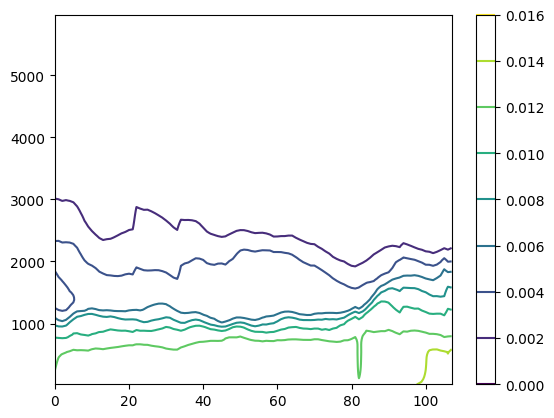

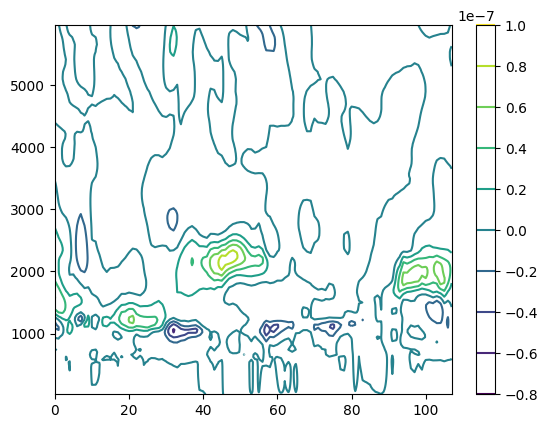

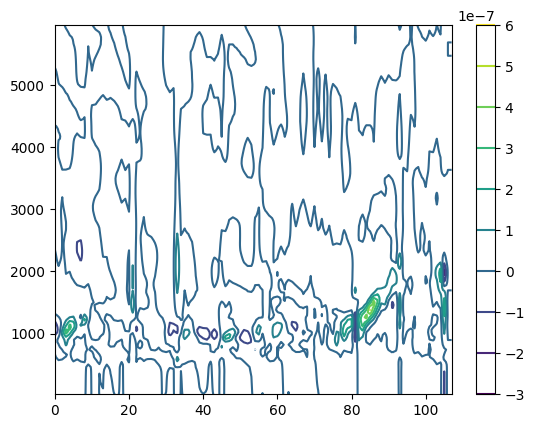

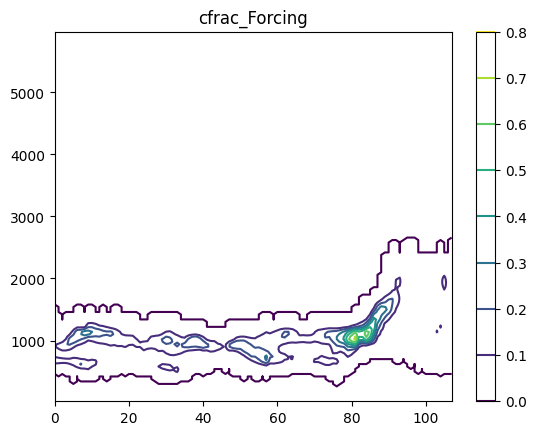

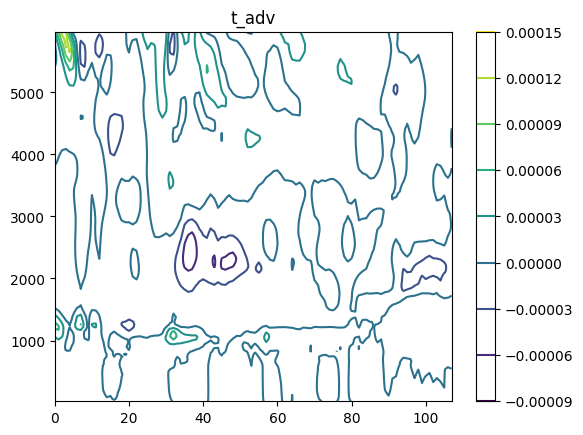

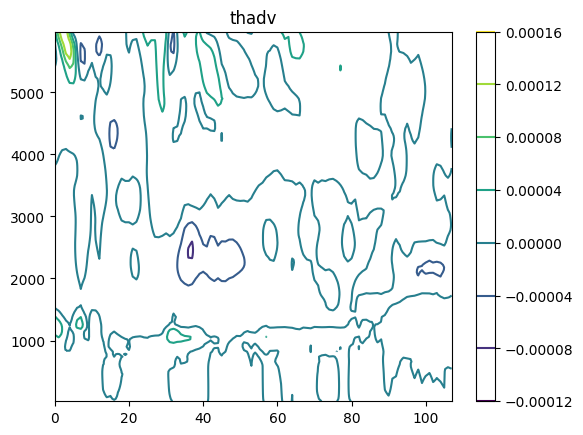

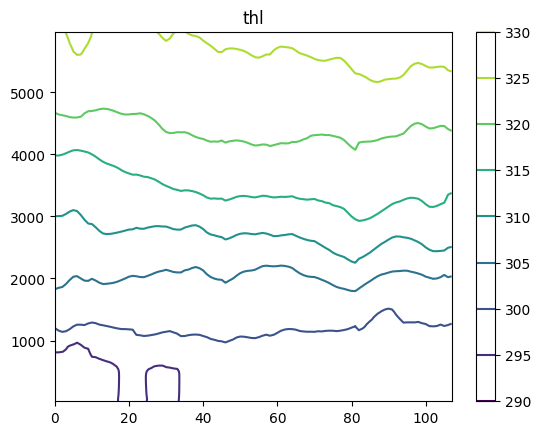

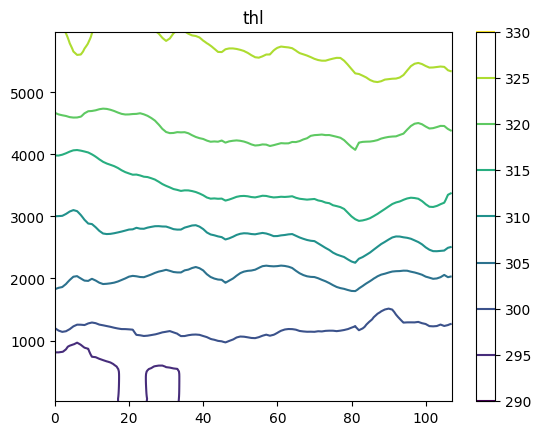

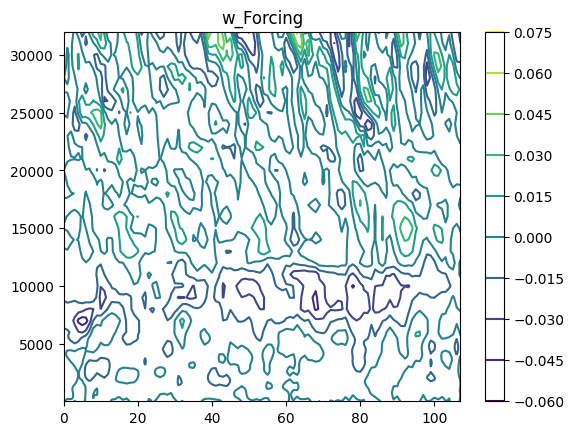

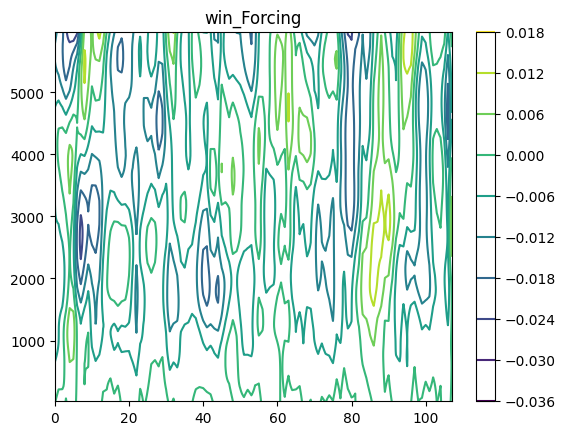

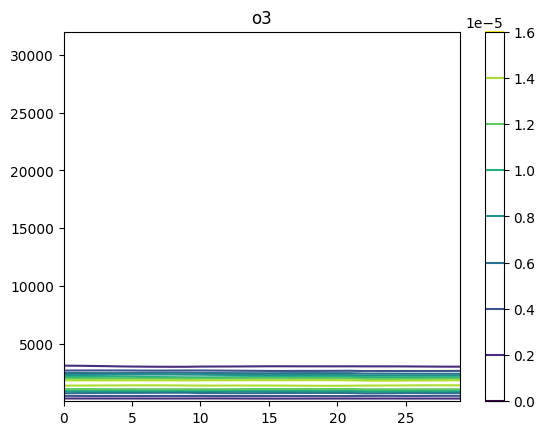

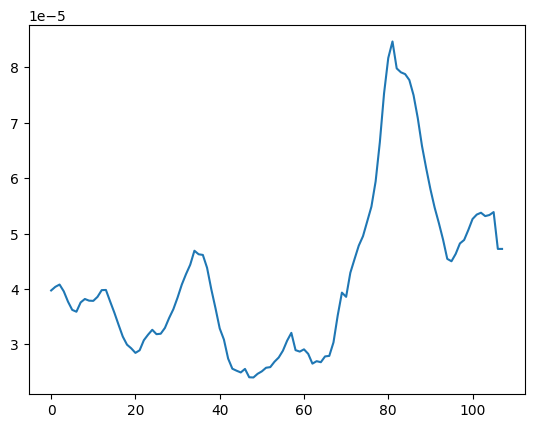

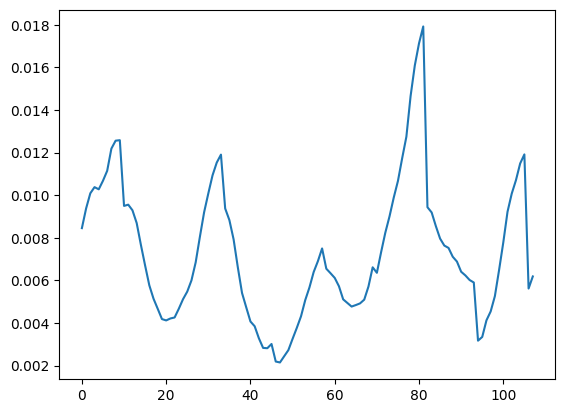

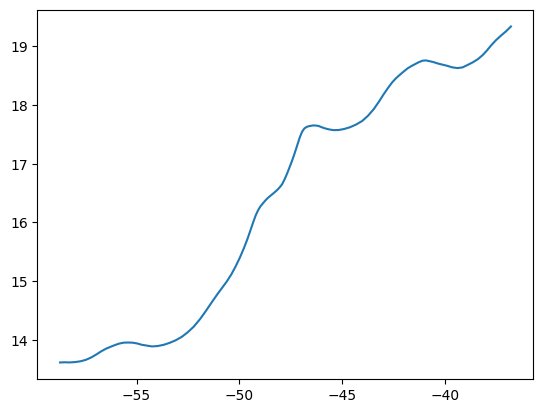

In [15]:
import netCDF4 as nc
import xarray as xr
import matplotlib.pyplot as pl
import numpy as np
import metpy.calc as mpcalc
import metpy
import math
import statistics
from metpy.units import units
#netcdf_path = '/home/girish/microhh/cases/eurec4a/forcings/scm_in.ECMWF-fc_EUREC4A_coor-Lagrangian-traj0-p950_domain2.0x2.0_20200205_ndays5_sfcERA5.nc'
netcdf_path = '/fs/ess/PFS0220/eurec4a/forcings/eurec4a_20200202_narenpitak_extended.kpt_inversion.nc'
all_data = xr.open_dataset(netcdf_path,decode_times=False)
ts = 0;
all_data = xr.open_dataset(netcdf_path,decode_times=False)
time = all_data['time'].values[ts:];
tn=time.size 
pres0=all_data['ps'].values[ts:tn+1];
select_arr=np.logical_and(np.logical_not(np.isnan(pres0)),(time%3600)==0)
time2 = time[select_arr]
qadv_un=all_data['qadv'].values[select_arr,:];         qadv_un=np.flip(qadv_un, axis=1);
tadv_un=all_data['tadv'].values[select_arr,:];         tadv_un=np.flip(tadv_un, axis=1);
tladv_un=all_data['tladv'].values[select_arr,:];         tladv_un=np.flip(tadv_un, axis=1);
time = all_data['time'].values[select_arr];
qt_un=all_data['q'].values[select_arr,:];              qt_un=np.flip(qt_un, axis=1);
ql_un=all_data['ql'].values[select_arr,:];             ql_un=np.flip(ql_un, axis=1)
pres_un=all_data['pressure_f'].values[select_arr,:];         pres_un=np.flip(pres_un, axis=1)
pres0=all_data['ps'].values[select_arr];
sst=all_data['open_sst'].values[select_arr];
T_un=all_data['t'].values[select_arr,:];               T_un=np.flip(T_un, axis=1);
zun=all_data['height_f'].values[select_arr,:];         zun=np.flip(zun, axis=1);
omega_un = all_data['omega'].values[select_arr,:];     omega_un=np.flip(omega_un, axis=1);
omg=all_data['sfc_lat_flx']; 
qad=all_data['qadv'];
mom_rough=all_data['albedo']; 
q_skin=all_data['u_traj'].values[ts:tn+1]; 
u_un=all_data['u'].values[select_arr,:];                   u_un=np.flip(u_un, axis=1);
v_un=all_data['v'].values[select_arr,:];                   v_un=np.flip(v_un, axis=1);
ug_un=all_data['ug'].values[select_arr,:];                   ug_un=np.flip(ug_un, axis=1);
vg_un=all_data['vg'].values[select_arr,:];                   vg_un=np.flip(vg_un, axis=1);
cloud_frac_un=all_data['cloud_fraction'].values[select_arr,:]; cloud_frac_un=np.flip(cloud_frac_un, axis=1);
o3_un=all_data['o3'].values[select_arr,:];                   o3=np.flip(o3_un, axis=1);
dz_fine = 40;
z_fine_top = 6000.;
k_fine = z_fine_top/dz_fine;
z1 = np.linspace(0.5*dz_fine, z_fine_top-0.5*dz_fine, int(k_fine));


print(time[0])
tttt=time[0]
z_coarse_top = 32001;
dz_coarse = 1000;
z2 = np.arange(z_fine_top, z_coarse_top, dz_coarse)
z = np.concatenate((z1, z2))
zh = 0.5*(z[:-1] + z[1:])
zh = np.append(0., zh)
zh = np.append(zh, z.size)

lon = all_data['lon'].values[select_arr]; #lon = 360 - lon;
lat = all_data['lat'].values[select_arr];
H=all_data['sfc_sens_flx'].values[select_arr];
L = all_data['sfc_lat_flx'].values[select_arr];
time = time - time[0];
time_full=all_data['date'].values;
qs=all_data['q_soil'].values[select_arr];
u = np.zeros((time.size, z.size))
v = np.zeros((time.size, z.size))
ug = np.zeros((time.size, z.size))
vg = np.zeros((time.size, z.size))
th = np.zeros(np.shape(u))
thl   = np.zeros(np.shape(u))
thlls = np.zeros(np.shape(u))
pres = np.zeros(np.shape(u))
T = np.zeros(np.shape(u))
qt = np.zeros(np.shape(u))
ql = np.zeros(np.shape(u))
qadv=np.zeros(np.shape(u))
tadv=np.zeros(np.shape(u))
tladv=np.zeros(np.shape(u))
thadv=np.zeros(np.shape(u))
thladv=np.zeros(np.shape(u))
qtls=np.zeros(np.shape(u))
uls=np.zeros(np.shape(u))
vls=np.zeros(np.shape(u))
o3=np.zeros(np.shape(u))
qt_dqdt=np.zeros(np.shape(u))
omega = np.zeros(np.shape(u))
wls = np.zeros((time.size, z.size+1))
w = np.zeros(np.shape(u))
cloud_frac=np.zeros(np.shape(u))
sbotqt = np.zeros(time.size)
th_diff = np.zeros(time.size)
qt_diff = np.zeros(time.size)
U = np.zeros(time.size) 
fc = np.zeros(time.size)
cp  = 1005.
Lv  = 2.5e6
Rd  = 287.


for n in range(0,time.size):
    interp_arr=(np.logical_not(np.isnan(zun[n,:])))
    #interp_arr=(np.logical_not(np.isnan(zun[0,:])))
    qt[n,:] = np.interp(z,zun[n,interp_arr],qt_un[n,interp_arr])
    ql[n,:] = np.interp(z,zun[n,interp_arr],ql_un[n,interp_arr])
    qadv[n,:] = np.interp(z,zun[n,interp_arr],qadv_un[n,interp_arr])
    tadv[n,:] = np.interp(z,zun[n,interp_arr],tadv_un[n,interp_arr])
    tladv[n,:] = np.interp(z,zun[n,interp_arr],tladv_un[n,interp_arr])
    pres[n,:] = np.interp(z,zun[n,interp_arr],pres_un[n,interp_arr])
    T[n,:] = np.interp(z,zun[n,interp_arr],T_un[n,interp_arr])
    omega[n,:] = np.interp(z,zun[n,interp_arr],omega_un[n,interp_arr])
    u[n,:] = np.interp(z,zun[n,interp_arr],u_un[n,interp_arr])
    v[n,:] = np.interp(z,zun[n,interp_arr],v_un[n,interp_arr])
    ug[n,:] = np.interp(z,zun[n,interp_arr],ug_un[n,interp_arr])
    vg[n,:] = np.interp(z,zun[n,interp_arr],vg_un[n,interp_arr])
    cloud_frac[n,:] = np.interp(z,zun[n,interp_arr],cloud_frac_un[n,interp_arr])
    o3[n,:] = np.interp(z,zun[n,interp_arr],o3_un[n,interp_arr])

p_sbot = pres0;
for n in range(0,time.size):
    sat_r = mpcalc.saturation_mixing_ratio(pres0[n] * units.pascal , sst[n]* units.kelvin)
    fc[n] = mpcalc.coriolis_parameter(lat[n]*units.degrees) * units.second
    sbotqt[n] = 0.98 * mpcalc.specific_humidity_from_mixing_ratio(sat_r)
    for k in range(0,z.size):
        mix_ratio = mpcalc.mixing_ratio_from_specific_humidity(qt[n,k])
        w[n,k] = mpcalc.vertical_velocity(omega[n,k] * units.pascal / units.second, pres[n,k] * units.pascal, T[n,k] * units.kelvin, mix_ratio) / (units.meter / units.second)
        th[n,k] = mpcalc.potential_temperature(pres[n,k] * units.pascal, T[n,k] * units.kelvin) / units.kelvin
        thadv[n,k] = mpcalc.potential_temperature(pres[n,k] * units.pascal, tadv[n,k] * units.kelvin) / units.kelvin
        thl[n,k] = th[n,k] - (th[n,k]/T[n,k]) * (Lv/cp) * (ql[n,k]/(1-qt[n,k]))
        thladv[n,k] = th[n,k]*np.exp(-ql[n,k]*Lv/(cp*T[n,k]))

tv = T * (1 + 0.61 * qt)
rho_arr = pres / (Rd * tv)
thlin = T * (1.e5/pres)**(Rd/cp)
win = -omega / (rho_arr*9.81)

for n in range(0,time.size-1):
    thlls[n,:] = (th[n+1,:]-th[n,:])/(time[n+1]-time[n])
    qtls[n,:] = (qt[n+1,:]-qt[n,:])/(time[n+1]-time[n])
    uls[n,:] = (u[n+1,:]-u[n,:])/(time[n+1]-time[n])
    vls[n,:] = (v[n+1,:]-v[n,:])/(time[n+1]-time[n])
    wls_un = (w[n+1,:]-w[n,:])/(time[n+1]-time[n])
    wls[n,:] = np.interp(zh,z,wls_un)
wls[time.size-1,:] = wls[time.size-2,:]
uls[time.size-1,:] = uls[time.size-2,:]
vls[time.size-1,:] = vls[time.size-2,:]
qtls[time.size-1,:] = qtls[time.size-2,:]
thlls[time.size-1,:] = thlls[time.size-2,:]
qt_dqdt[0,:] = qt[0,:];
for i in range(0,time.size-1):
    for j in range(0,z.size):
        qt_dqdt[i+1,:] = qt_dqdt[i,:] + qtls[i,:] * (time[n+1]-time[n])

##### Fluxes ################
Ch=0.001094; Cq=0.001133
rhosurf = pres0 / (Rd * thl[:, 0] * (1. + 0.61 * qt[:, 0]))
qtbot = L / (rhosurf * Lv) #J/m2s / (J/m3) --> m/s
sbotthl = H / (rhosurf * cp) # K m/s

ths = sst / (p_sbot/1.e5)**(287.04/1005.)


for n in range(time.size):
    th_diff[n] = th[n,0]-ths[n]
    qt_diff[n] = qt[n,0]-sbotqt[n]
    U[n]=math.sqrt(u[n,0]**2+v[n,0]**2)

sh_flx = -Ch * U * th_diff
lat_flx = -Cq * U * qt_diff
aa = thlls/tadv

pl.figure()
pl.contour(time/3600,z[0:150],np.transpose(qt[:,0:150]))
pl.colorbar()

pl.figure()
pl.contour(time/3600,z[0:150],np.transpose(qadv[:,0:150]))
pl.colorbar()

pl.figure()
pl.contour(time/3600,z[0:150],np.transpose(qtls[:,0:150]))
pl.colorbar()

pl.figure()
pl.contour(time[:]/3600,z[0:150],np.transpose(cloud_frac[:,0:150]))
pl.title('cfrac_Forcing')
pl.colorbar()

pl.figure()
pl.contour(time[:]/3600,z[0:150],np.transpose(tadv[:,0:150]))
pl.title('t_adv')
pl.colorbar()

pl.figure()
pl.contour(time[:]/3600,z[0:150],np.transpose(thadv[:,0:150]))
pl.title('thadv')
pl.colorbar()

pl.figure()
pl.contour(time[:]/3600,z[0:150],np.transpose(thladv[:,0:150]))
pl.title('thl')
pl.colorbar()

pl.figure()
pl.contour(time[:]/3600,z[0:150],np.transpose(thl[:,0:150]))
pl.title('thl')
pl.colorbar()

pl.figure()
pl.contour(time/3600,z,np.transpose(w))
pl.title('w_Forcing')
pl.colorbar()

pl.figure()
pl.contour(time[:]/3600,z[0:150],np.transpose(win[:,0:150]))
pl.title('win_Forcing')
pl.colorbar()

pl.figure()
pl.contour(time[0:30]/3600,z[:],np.transpose(o3[0:30,:]))
pl.title('o3')
pl.colorbar()

pl.figure()
pl.plot(time/3600,lat_flx)

pl.figure()
pl.plot(time/3600,sh_flx)

pl.figure()
pl.plot(lon,lat)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Text(0, 0.5, 'iorg')

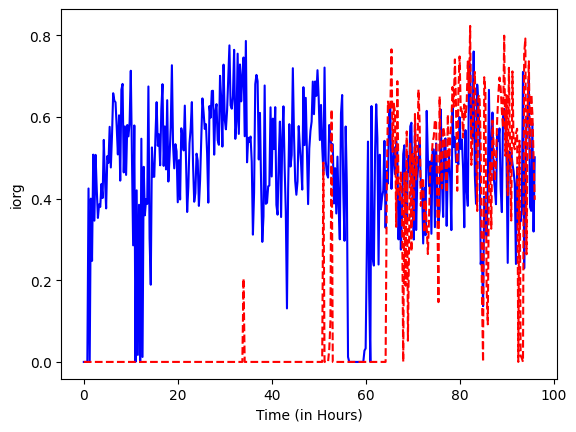

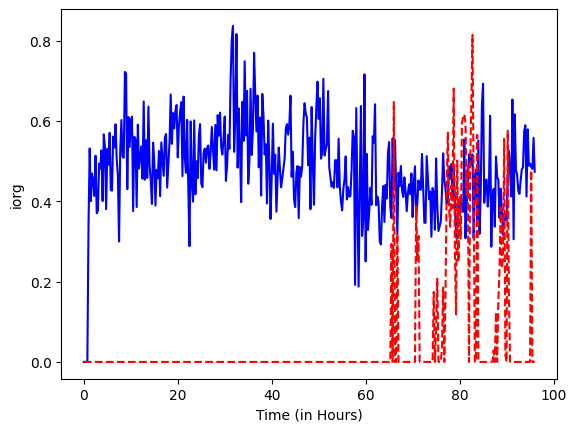

In [7]:
#### Field Plots #####
import os
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import cm
import math
from scipy.stats import norm
import seaborn as sns
import xarray as xr
import netCDF4 as nc
import sys

sys.setrecursionlimit(100000)

###########################################################################################################################
def make_netcdffile_fromcross(time_start, time_end, time_gap, x_spacing, variable_name, path, output_name, del_files): 
    float_type = 'f4'
    time_ind_total = int((time_end-time_start)/time_gap) + 1
    time = np.linspace(time_start,time_end,time_ind_total)
    filename = path+variable_name + str(format(int(time[0]),'07d'))
    fid=open(filename,'rb')
    x_length = int(np.sqrt(len(np.fromfile(fid))))
    x=np.linspace(x_spacing,x_length*x_spacing,x_length)
    y=np.linspace(x_spacing,x_length*x_spacing,x_length)
    fid.close()
    if os.path.exists(path+output_name):
        os.remove(path+output_name)
    nc_file = nc.Dataset(path+output_name, mode="w", datamodel="NETCDF4", clobber=False)
    nc_file.createDimension("x", x_length)
    nc_file.createDimension("y", x_length)
    nc_file.createDimension("t", time_ind_total)
    nc_x = nc_file.createVariable("x", float_type, ("x"))
    nc_y = nc_file.createVariable("y", float_type, ("y"))
    nc_t = nc_file.createVariable("t", float_type, ("t"))
    var_name = variable_name.split('.')[0]
    locals()[var_name] = np.zeros((x_length,x_length,time_ind_total))
    locals()['nc_'+var_name] = nc_file.createVariable(var_name, float_type, ("x","y","t"))                    
    for i in range(0,time_ind_total):
        filename = path+variable_name+str(format(int(time[i]),'07d'))
        fid=open(filename,'rb')
        var = np.fromfile(fid)
        locals()[var_name][:,:,i]=np.reshape(var,[x_length,x_length])
        fid.close()
    locals()['nc_'+var_name][:] = locals()[var_name][:]




    nc_x [:] = x[:]
    nc_y [:] = y[:]
    nc_t [:] = time[:]
    nc_file.close()
    if del_files:
        #files = ["u", "v", "w", "thl", "time", "qr", "ql", "couv", "grid", "nr","qt","therm","bc"]
        files = [variable_name]
        for file in os.listdir(path):
            for i in range(0,len(files)):
                if file.find(files[i])!=-1: 
                    os.remove(path+file)
                #rm u* v* w* thl* time* qr* ql* couv* grid* nr* qt* therm* 
##########################################################################################
class cell:
    def __init__(self, id):
        self.id = id
        self.value = [[]]
        self.location = [[],[]]
        self.nelements = 0
        self.nelements_local = 0

    def add_elements(self, i, j, var_values):
        self.location[0].append(i)
        self.location[1].append(j)
        self.value[0].append(var_values)
        self.nelements = self.nelements + 1
        self.nelements_local = self.nelements_local + 1
    def __del__(self):
        return
##########################################################################################
def find_boolean(variable, threshold_criteria): #variable is f(i, j, t): --> outputs boolean -1 (unsatisfied) 0 (satisfied) 
    boolean = np.zeros(( len(variable[:,0]), len(variable[0,:])))
    boolean = -1
    boolean = np.where(variable[:,:]>threshold_criteria,0,-1)
    return boolean;
########################################################################################
def identify_elements_in_cell(i,j,new_cell):  #input the ijk at which boolean is satisfied along with boolean and new cell created 

    global booli;
    new_cell.add_elements(i,j,cell_variable[i,j])
    booli[i,j] = -1

    ii=i-1; jj=j; #look west
    if ii<0:
       ii = nx-1
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell)  

    ii=i+1; jj=j;  #look east
    if ii>nx-1:
       ii = 0
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell)  

    ii=i; jj=j+1;  #look north
    if jj>ny-1:
        jj = 0
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell)  

    ii=i; jj=j-1;  #look south
    if jj<0:
       jj = ny-1
    if (booli[ii,jj] == 0):
        identify_elements_in_cell(ii,jj,new_cell) 
#################################################################################################
def create_new_cell(variable,bool):                                # input the boolean and the variable, output is the cells tracked (i,j,t) based on boolean 
    cell_number = 0;
    global booli,cell_variable,nx,ny;
    nx = len(variable[:,0])
    ny = len(variable[0,:])
    booli=bool;cell_variable = variable;
    variable_cells = []
    for j in range(0,ny):
        for i in range(0,nx):
            if booli[i,j]==0: 
                new_cell=cell(cell_number) 
                identify_elements_in_cell(i,j,new_cell)
                if new_cell.nelements>=nminelems:
                    variable_cells.append(new_cell)
                    variable_cells[cell_number].id = cell_number
                    cell_number = cell_number + 1
                else:
                    del new_cell;
    return variable_cells, cell_number;
#################################################################################################
def run_tracking(tracked_variable,param_threshold):
    global nx,ny;
    nx = len(tracked_variable[:,0]); ny = len(tracked_variable[0,:]); 
    bool = find_boolean(tracked_variable,param_threshold)
    [cells,cell_number] = create_new_cell(tracked_variable,bool);
    return cells,cell_number;
####################################################################################################
def find_cell_centers(cells,ncells):
    centers=np.zeros((ncells,2))
    for i in range(0,ncells):
        centers[i,0]=np.mean(cells[i].location[0])
        centers[i,1]=np.mean(cells[i].location[1])
    return centers;
####################################################################################################
def find_nearest_neighbor(centers,nx,ny):
    distance=np.zeros(len(centers[:,0]))
    nn_distance=np.zeros(len(centers[:,0]))
    for i in range(len(centers[:,0])):
        for j in range(len(centers[:,0])):
            if i==j:
                distance[j]=100;
            else:
                xdist=min(abs(centers[i,0]+nx-centers[j,0]),abs(centers[i,0]-nx-centers[j,0]),abs(centers[i,0]-centers[j,0]))
                ydist=min(abs(centers[i,1]+ny-centers[j,1]),abs(centers[i,1]-ny-centers[j,1]),abs(centers[i,1]-centers[j,1]))
                distance[j]=math.sqrt(xdist**2+ydist**2)
        nn_distance[i]=min(distance)
    return nn_distance;
####################################################################################################
def retrieve_variable(variable_name,netcdf_path): #open corresponding netcdf file and read data
    all_data=xr.open_dataset(netcdf_path)
    var=all_data[variable_name].values
    variable=var
    x=all_data['x'].values
    y=all_data['y'].values
    t=all_data['t'].values
    return variable, x, y, t;    
##########################################################################################
#[w_cross,x,y,t]=retrieve_variable(variable_name='w',netcdf_path='/fs/ess/PFS0220/eurec4a/case_1060lagtraj_feb2_withw/w_cross.nc')
def get_iorg(variable,param_threshold,start_ind,stop_ind):
    i_org=np.zeros(len(variable[0,0,start_ind:stop_ind+1]))
    for i in range(0,stop_ind-start_ind+1):
        [updraft,ncells]=run_tracking(tracked_variable=variable[:,:,start_ind+i],param_threshold=param_threshold)
        if ncells<2:
            i_org[i]=0;
        else:
            centers=find_cell_centers(updraft,ncells)
            nn_distance=find_nearest_neighbor(centers,nx,ny)
            centers=centers.astype(int)
            nn_sorted = np.sort(nn_distance*delx/1000);nn_sorted=nn_sorted/max(nn_sorted)
            p = 1. * np.arange(len(nn_distance)) / (len(nn_distance) - 1)
            p_ran=1-np.exp(-1*(math.pi)*nn_sorted*nn_sorted)
            i_org[i]=np.trapz(p,x=p_ran)
        if i==0 and ncells>2:
            pl.figure()
            pl.contour(x/1000,y/1000,variable[:,:,start_ind+i]>1)
            pl.title('w > 1 ms$^-1$ at z = 800 m')
            pl.xlabel('X (km)')
            pl.ylabel('Y (km)')
            pl.show()
            
            pl.figure()
            center_arr=np.zeros((nx,ny))
            center_arr[(centers[:,0]),(centers[:,1])]=1;
            pl.contour(x/1000,y/1000,center_arr)
            pl.xlabel('x')
            pl.ylabel('y')
            pl.title('Centroids of Updrafts')

            pl.figure()
            distance_arr=np.zeros((nx,ny))
            distance_arr[(centers[:,0]),(centers[:,1])]=nn_distance;
            pl.contour(x/1000,y/1000,center_arr)
            pl.xlabel('x')
            pl.ylabel('y')
            pl.title('Centroids of Updrafts')

            pl.figure()
            pl.plot(nn_sorted,p,nn_sorted,p_ran)
            pl.xlabel('x (NN Distance)')
            pl.ylabel('p=F(x)')

            pl.figure()
            pl.plot(p_ran,p,p_ran,p_ran,'b--')
            pl.xlabel('Random CDF')
            pl.ylabel('NNCDF')            

        print(i)
    return i_org;
#########################################################################################
def get_maxelems(variable,param_threshold,start_ind,stop_ind):
    maxelems=np.zeros(len(variable[0,0,start_ind:stop_ind+1]))
    maxcell_value=np.zeros(len(variable[0,0,start_ind:stop_ind+1]))
    for i in range(0,stop_ind-start_ind+1):
        [updraft,ncells]=run_tracking(tracked_variable=variable[:,:,start_ind+i],param_threshold=param_threshold)
        nelems=np.zeros((ncells))
        for j in range(0,ncells):
            nelems[j]=updraft[j].nelements
        maxelems[i]=max(nelems,default=0)
        if maxelems[i]>0:
            ind=np.nonzero(nelems==max(nelems))[0][0]
            maxcell_value[i]=np.sum(updraft[ind].value[0][:])
        
        if i%10==0:
            print(i)
    return maxelems,maxcell_value;
######################################################################################################################
delx=200
nc_path='/fs/ess/PFS0220/eurec4a/case_1060lagtraj_feb2_withw/'
#make_netcdffile_fromcross(time_start=0,time_end=3456,time_gap=9,x_spacing=delx,variable_name='couvreux.xy.00045.',path=nc_path,output_name='couvreux_cross2.nc',del_files=True)

#[w_cross,x,y,t]=retrieve_variable(variable_name='w',netcdf_path=nc_path+'w_cross.nc')
#nx=len(x);ny=len(y); start_ind=np.nonzero(t==180)[0][0]; stop_ind=np.nonzero(t==1395)[0][0]
#nminelems=10;
#i_org1=get_iorg(variable=w_cross,param_threshold=1,start_ind=start_ind,stop_ind=stop_ind)
#t1=t[start_ind:stop_ind+1]

[w_cross1,x,y,t]=retrieve_variable(variable_name='w',netcdf_path=nc_path+'w_cross1.nc')
nx=len(x);ny=len(y); start_ind=np.nonzero(t==0)[0][0]; stop_ind=np.nonzero(t==3456)[0][0]
nminelems=2;
i_org1=get_iorg(variable=w_cross1,param_threshold=1,start_ind=start_ind,stop_ind=stop_ind)
tt=t[start_ind:stop_ind+1]

[w_cross2,x,y,t]=retrieve_variable(variable_name='w',netcdf_path=nc_path+'w_cross2.nc')
nx=len(x);ny=len(y); start_ind=np.nonzero(t==0)[0][0]; stop_ind=np.nonzero(t==3456)[0][0]
nminelems=2; #t3=t[start_ind:stop_ind+1]
i_org2=get_iorg(variable=w_cross2,param_threshold=1,start_ind=start_ind,stop_ind=stop_ind)

[couv_cross1,x,y,t]=retrieve_variable(variable_name='couvreux',netcdf_path=nc_path+'couvreux_cross1.nc')
start_ind=np.nonzero(t==0)[0][0]; stop_ind=np.nonzero(t==3456)[0][0]
i_org3=get_iorg(variable=couv_cross1,param_threshold=1e-5,start_ind=start_ind,stop_ind=stop_ind)
#[max_ql,ql_cell]=get_maxelems(variable=qlpath,param_threshold=0.01,start_ind=start_ind,stop_ind=stop_ind)

[couv_cross2,x,y,t]=retrieve_variable(variable_name='couvreux',netcdf_path=nc_path+'couvreux_cross2.nc')
start_ind=np.nonzero(t==0)[0][0]; stop_ind=np.nonzero(t==3456)[0][0]
i_org4=get_iorg(variable=couv_cross2,param_threshold=1e-5,start_ind=start_ind,stop_ind=stop_ind)

#[qrpath,x,y,t]=retrieve_variable(variable_name='qrpath',netcdf_path=nc_path+'qrpath.nc')
#[max_qr,qr_cell]=get_maxelems(variable=qrpath,param_threshold=1e-4,start_ind=start_ind,stop_ind=stop_ind)

#[qrfluxbot,x,y,t]=retrieve_variable(variable_name='qrfluxbot',netcdf_path=nc_path+'qrfluxbot.nc')
#i_org=np.concatenate((i_org1,i_org2,i_org3))
#t_all=np.concatenate((t1,t2,t3))

#fig,ax=pl.subplots()
#pl.plot(t_all*100/3600,i_org)
#ax.plot(t3*100/3600,max_ql,'b-',t3*100/3600,max_qr,'r--')
#ax.set_xlabel('Time (in Hours)')
#ax.set_ylabel('Max_elelms')
#pl.yscale('log')
#ax2=ax.twinx()
#ax2.plot(t3*100/3600,i_org3,'g.-')
#ax2.set_ylabel('i_org')

#fig,ax=pl.subplots()
#ax.plot(t3*100/3600,ql_cell,'b-')
#ax.set_xlabel('Time (in Hours)')
#ax.set_ylabel('ql sum over Max Cell')
#pl.yscale('log')
#ax2=ax.twinx()
#ax2.plot(t3*100/3600,qr_cell,'r--')
#ax2.set_ylabel('qr sum over Max Cell')
#pl.yscale('log')
#hrs=80.25
#pl.figure()
#pl.contour(x,y,qlpath[:,:,int(hrs/100*3600)])

fig,ax=pl.subplots()
ax.plot(tt*100/3600,i_org1,'b-',tt*100/3600,i_org2,'r--')
ax.set_xlabel('Time (in Hours)')
ax.set_ylabel('iorg')

fig,ax=pl.subplots()
ax.plot(tt*100/3600,i_org3,'b-',tt*100/3600,i_org4,'r--')
ax.set_xlabel('Time (in Hours)')
ax.set_ylabel('iorg')

NameError: name 'qrfluxbot' is not defined

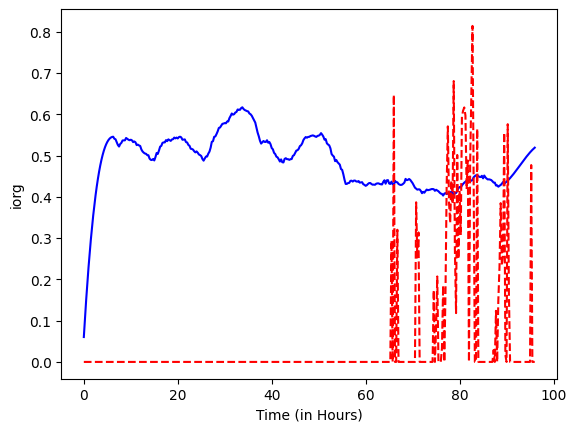

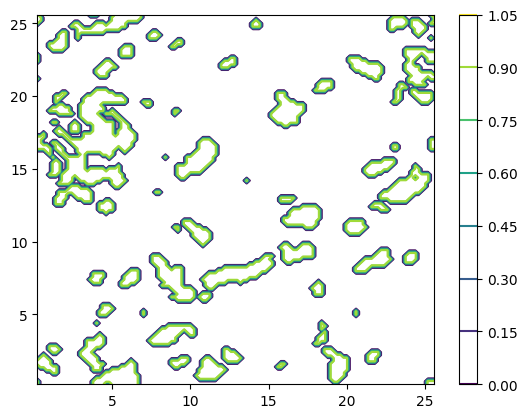

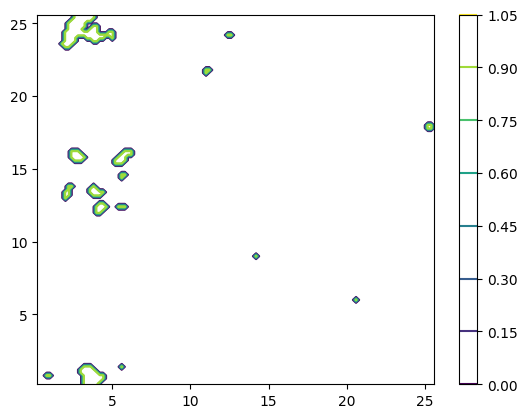

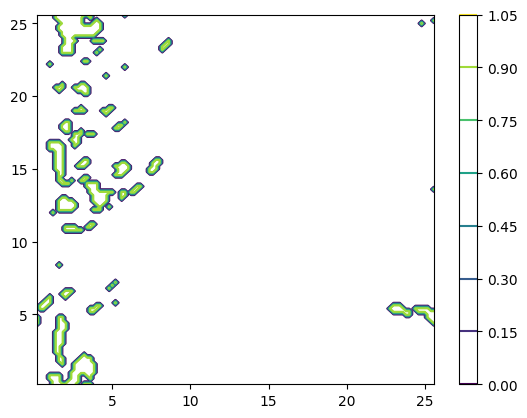

<Figure size 640x480 with 0 Axes>

In [13]:
from scipy.signal import savgol_filter
i_org_hat=savgol_filter(i_org3,51,3)
fig,ax=pl.subplots()
ax.plot(tt*100/3600,i_org_hat,'b-',tt*100/3600,i_org4,'r--')
ax.set_xlabel('Time (in Hours)')
ax.set_ylabel('iorg')
hrs=83
ind=np.nonzero(t*100/3600==hrs)[0][0]
levs=np.concatenate((np.linspace(0,0.0001,20),np.linspace(0.00011,1,1)))
pl.figure()
#pl.contourf(x/1000,y/1000,qlpath[:,:,int(ind)],levels=levs,cmap=cm.gray)
pl.contour(x/1000,y/1000,couv_cross1[:,:,int(ind)]>1e-5)
pl.colorbar()

pl.figure()
pl.contour(x/1000,y/1000,w_cross1[:,:,int(ind)]>1)
pl.colorbar()

pl.figure()
pl.contour(x/1000,y/1000,w_cross2[:,:,int(ind)]>1)
pl.colorbar()

pl.figure()
pl.contour(x/1000,y/1000,qrfluxbot[:,:,int(ind)])
pl.colorbar()

i_org_hat=savgol_filter(i_org3,51,4)
qr_cell_hat=savgol_filter(qr_cell,51,3)
fig,ax=pl.subplots()
#pl.plot(t_all*100/3600,i_org)
ax.plot(t3*100/3600,max_ql,'b-',t3*100/3600,max_qr,'r--')
ax.set_xlabel('Time (in Hours)')
ax.set_ylabel('Max_elelms')
pl.yscale('log')
ax2=ax.twinx()
ax2.plot(t3*100/3600,i_org3,'g-.')
ax2.set_ylabel('i_org')

fig,ax=pl.subplots()
ax.plot(t3*100/3600,i_org_hat,'b-',t3*100/3600,i_org3,'b--')
ax.set_xlabel('Time (in Hours)')
ax.set_ylabel('i_org')
#pl.yscale('log')
ax2=ax.twinx()
ax2.plot(t3*100/3600,qr_cell,'r--')
ax2.set_ylabel('qr sum over Max Cell')
pl.yscale('log')

In [ ]:
#### Inputs ####
x_dim=1060; 
y_dim=1060; 
dz_fine = 40;
dl=200;
hr=90;
scale='n'


#pwd='/fs/ess/PFS0220/eurec4a/case_1060lagtraj_feb2_withw/'
pwd='/fs/ess/PFS0220/eurec4a/case_1060T1_feb2_200m_lagtraj/'
ref_height=int(2780/dz_fine); 

levs_abs=np.concatenate((np.linspace(0,0.0001,10),np.linspace(0.00011,1,1)))
ql_time=str(format(int(hr*36),'04d'))
hgt_ind=str(format(int(ref_height),'05d'))
fid = open(pwd+'w.000'+ql_time,'rb')
#fid = open(pwd+'w.xy.'+hgt_ind+'.000'+ql_time,'rb')
var = np.fromfile(fid)
x=np.linspace(0,x_dim*dl,x_dim)
y=np.linspace(0,y_dim*dl,y_dim)
z_new=np.zeros(260)
z_abs=20
dz=40;
for i in range(0,z_new.size): 
    if i>150:
        dz=dz+int(round(0.1*dz,0));
    z_new[i] = z_abs;
    z_abs = z_abs+dz
z=z_new[0:195]

var=np.reshape(var,[z.size,x_dim,y_dim])
#var=np.reshape(var,[x_dim,y_dim])
var_plot=var[ref_height,:,:]
#var_plot=var[:,:]

pl.figure()
if scale =='g':
    pl.contourf(x/1000,y/1000,var_plot,levels=levs_abs,cmap=cm.gray)
else:
    pl.contour(x/1000,y/1000,var_plot>1)
pl.title('w > 1 ms$^-1$ at z = %d m' %(ref_height*dz_fine) + ' (%d hrs)'  %(int(ql_time)/36))

pl.xlabel('X (km)')
pl.ylabel('Y (km)')
pl.colorbar()
pl.show()